<table align="left">
<tr>

<th, style="background-color:white">
<img src="https://github.com/mlgill/ODSC_East_2017_PythonNLP/blob/master/assets/logo.png?raw=true", width=140, height=100>
</th>

<th, style="background-color:white">
<div align="left">
<h1>Learning from Text: <br> Introduction to Natural Language Processing with Python</h1>  
<h2>Michelle L. Gill, Ph.D.</h2>     
Senior Data Scientist, Metis  
ODSC East  
May 3, 2017 
</div>
</th>

</tr>
</table>  

## Hierarchical Text Clustering Exercise Answers

We will be using a subset of the Reuters data set, which is a collection of 9,603 newswire articles. The training set contains training articles from April 7, 1987 and a test set from the following day (April 8, 1987).

This dataset is included with the NLTK corpora, so the initial code will handle loading the data.

In [1]:
import numpy as np
import pandas as pd
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

import nltk
from accessory_functions import nltk_path
# Setup nltk corpora path
nltk.data.path.insert(0, nltk_path)

%matplotlib inline

Load the data.

In [2]:
from nltk.corpus import reuters

reuters.ensure_loaded()

A function to load the data and create data and category dataframes.

In [3]:
def load_data(data_obj):
    
    # Sort the filenames into train and test
    category_docs = data_obj.fileids()

    # Get the text for the train and test files
    text = [data_obj.raw(x) for x in category_docs]

    # Create dataframe
    data_df = pd.DataFrame({'fileid':category_docs, 
                             'text':text}).set_index('fileid')

    # Load the categories and create a dataframe
    category_list = data_obj.categories()

    category_dict = [(pd.DataFrame({x: data_obj.fileids(x)})
                      .stack()
                      .to_frame()
                      .reset_index(level=-1))
                     for x in category_list]
    category_df = pd.concat(category_dict, axis=0).reset_index(drop=True)
    category_df.columns = ['category', 'fileid']
    category_df = category_df.set_index('category')
    
    return data_df, category_df

In [4]:
data, category = load_data(reuters)

print(data.shape, category.shape)

data.head(5)

(10788, 1) (13328, 1)


,text
fileid,
test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...
test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...
test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...
test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n ...
test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY\n Ind...


Select just the cocoa and coffee articles.

In [5]:
cocoa = category.loc['cocoa']
coffee = category.loc['coffee']

cocoa_data = data.loc[cocoa.fileid]
coffee_data = data.loc[coffee.fileid]

data_sm = pd.concat([cocoa_data, coffee_data])

print(data_sm.shape, data_sm.drop_duplicates().shape)

data_sm = data_sm.drop_duplicates().sample(frac=1, replace=False,
                                           random_state=42)

data = data_sm

(212, 1) (202, 1)


If you prefer to work with lists rather than Pandas dataframes, they can be created by copying and pasting the following code into a cell. This should be executed after preprocessing the data in Question 1 below.

```python
data = data.text.tolist()
```

## Question 1

* Preprocess the data using the convenience function in `accessory_functions`
* Use count vectorizer to create a document-term matrix with counts

In [6]:
from accessory_functions import preprocess_series_text

data['text'] = preprocess_series_text(data.text, 
                                      nltk_path=nltk_path)
data.head()

,text
fileid,
test/20382,ibc seek export detail set coffee quota brazil...
test/19500,japan ratify international cocoa agreement jap...
training/10619,japan join international cocoa agreement japan...
training/3034,uganda disappointed coffee talk failure uganda...
training/75,ico exporter modify new proposal international...


The document-term matrix.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
X = cv.fit_transform(data.text)

print(X.toarray().shape)

(202, 3126)


## Question 2

* Perform clustering on a few of the documents using either cosine distance (1 - cosine_similarity) or Euclidean distance.
* Plot the results in a dendrogram.

In [8]:
from scipy.cluster.hierarchy import ward, dendrogram, fcluster
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
cos_dist = 1 - cosine_similarity(X[:25])

In [10]:
linkage_matrix = ward(cos_dist)

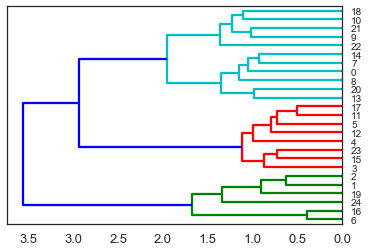

In [11]:
dendrogram(linkage_matrix, orientation='left');

## Question 3

* Get the flattened clusters for one of the linkage matrices using `fcluster`
* Using the cluster number, print some of each of the articles in the respective clusters

The flattened clusters.

In [12]:
k=2
clusters = fcluster(linkage_matrix, k, criterion='maxclust')
clusters

array([2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2,
       2, 1], dtype=int32)

The first cluster is about cocoa.

In [13]:
mask = clusters == 1
data.text.loc[mask].map(lambda x: x[:80]).values

array([ 'japan ratify international cocoa agreement japan ratify international cocoa agre',
       'japan join international cocoa agreement japan process join international cocoa ',
       'cocoa talk slow crucial stage delegate international cocoa organization icco tal',
       'icco examine buffer stock proposal tomorrrow international cocoa organization ic',
       'haiti czechoslovakia join cocoa organization haiti czechoslovakia join internati',
       'icco put world cocoa surplus tonne vs delegate icco put world cocoa surplus tonn'], dtype=object)

The second cluster is about coffee.

In [14]:
mask2 = np.invert(mask)
data.text.loc[mask2].map(lambda x: x[:80]).values

array([ 'ibc seek export detail set coffee quota brazilian coffee institute ibc give ship',
       'uganda disappointed coffee talk failure uganda africa second large coffee produc',
       'ico exporter modify new proposal international coffee organization ico exporter ',
       'ico coffee producer discuss market situation international coffee organization i',
       'colombia open april may coffee registration colombia open coffee export registra',
       'brazil treasury release coffee buying fund treasury department due release fund ',
       'indonesian tea cocoa export see coffee indonesia export tea cocoa continue rise ',
       'ghana cocoa purchase still ahead last year ghana cocoa board say purchase tonne ',
       'producer split heat coffee quota talk talk possibility reintroduce global coffee',
       'indonesia press compromise coffee indonesian coffee exporter prepare period depr',
       'price generally low nairobi coffee auction price low week coffee auction grade q'